<a href="https://colab.research.google.com/github/sandhc1/GUVI_DS/blob/main/Assignments/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df[df.columns[0]].quantile(0.75)

17.15

In [ ]:
df.shape

(15, 2)

In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
iqr = df[df.columns[0]].quantile(0.75) - df[df.columns[0]].quantile(0.25)
upper_threshold = df[df.columns[0]].quantile(0.75) + (1.5*iqr)
lower_threshold = df[df.columns[0]].quantile(0.25) - (1.5*iqr)
print(upper_threshold)
print(lower_threshold)

19.699999999999996
12.9


In [ ]:
iqr = df[df.columns[1]].quantile(0.75) - df[df.columns[1]].quantile(0.25)
upper_threshold = df[df.columns[1]].quantile(0.75) + (1.5*iqr)
lower_threshold = df[df.columns[1]].quantile(0.25) - (1.5*iqr)
print(upper_threshold)
print(lower_threshold)

98.4
58.400000000000006


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


there is a linear relationship. corr>0.2 or corr<-0.2 has a linear relationship.

no need of transformations.

**1. Find the linear regression equation for this data.**

---



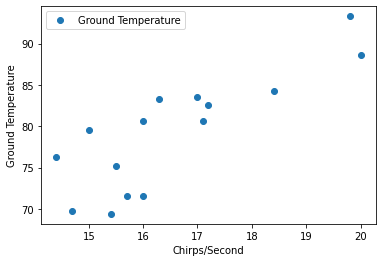

In [ ]:
df.plot(x = df.columns[0], y = df.columns[1], style='o')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

there is a linear relationship between target and feature.

no transformation required.

In [ ]:
X = df.loc[:,[df.columns[0]]]
y = df.loc[:,df.columns[1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
LR =LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
LR.intercept_ # c

29.788444097713217

In [ ]:
LR.coef_ # m

array([2.9946365])

In [ ]:
# ground_temp = (chrips * 2.99) + 29.788
# y = m * x + c

In [ ]:
y_pred = LR.predict(X_test)
y_pred

array([84.88975572, 76.80423716, 73.80960066, 89.08224682, 74.70799161])

In [ ]:
result = pd.DataFrame({
    'Actual' : y_test,
    'Predict': y_pred,
})

result

,Actual,Predict
3,84.3,84.889756
7,71.6,76.804237
6,69.7,73.809601
2,93.3,89.082247
10,79.6,74.707992


**3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

---



In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.7685427938033862

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 :', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 3.802671022477938
Mean Squared Error: 17.20838036630584
R2 : 0.8766657252358998


**2.Chart the original data and the equation on the chart.**

---



In [ ]:
y_pred = y_pred.reshape(-1,1)

In [ ]:
y_pred.shape

(5, 1)

In [ ]:
X_train.shape

(10, 1)

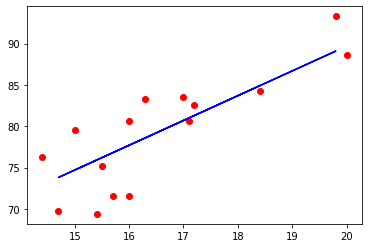

In [ ]:
plt.scatter(X,y, color='red')
plt.plot(X_test,y_pred, color='blue')
plt.show()

**4. Extrapolate data:  If the ground temperature reached 95, then at what 
approximate rate would you expect the crickets to be chirping?**


---



In [ ]:
# ground_temp = (chrips * 2.99) + 29.788
# y = m * x + c
chrips = (95 -29.788)/2.99 
chrips

21.810033444816053

**5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?**


---



In [ ]:
temp = LR.predict([[18]])
temp

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([83.69190112])

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [55]:
df = pd.read_fwf("https://raw.githubusercontent.com/sandhc1/DataSets/main/brain_body.txt")

In [56]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
lower = df.Brain.quantile(0.25) - (1.5*iqr)
upper = df.Brain.quantile(0.75) + (1.5*iqr)
print(lower)
print(upper)


-70.80375000000001
119.60625


In [ ]:
df.Brain = df.Brain.clip(lower,upper)

In [ ]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
lower = df.Body.quantile(0.25) - (1.5*iqr)
upper = df.Body.quantile(0.75) + (1.5*iqr)
print(lower)
print(upper)

-238.375
408.625


In [ ]:
df.Body = df.Body.clip(lower,upper)

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,28.293411,104.676532
std,43.429069,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,114.131250,408.625000


In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.889028
Body,0.889028,1.000000


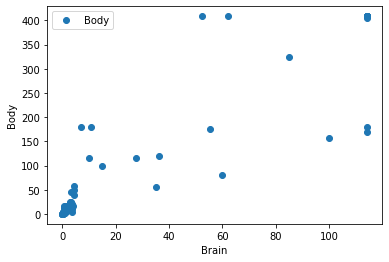

In [ ]:
df.plot(x = df.columns[0], y = df.columns[1], style='o')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

In [ ]:
df.shape

(62, 2)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:]
y = df.iloc[:,0:1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape, y_train.shape

((43, 1), (43, 1))

In [ ]:
X_test.shape, y_test.shape

((19, 1), (19, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

array([[9.72893861e+01],
       [3.13477155e-01],
       [1.23059956e-01],
       [6.12120171e+00],
       [1.95582549e+00],
       [9.72893861e+01],
       [6.22905103e-01],
       [9.35829409e+00],
       [1.33570553e+01],
       [3.73972266e+01],
       [2.90791149e+00],
       [8.73567317e-02],
       [4.19322758e+00],
       [4.28717211e+01],
       [5.99102953e-01],
       [9.72893861e+01],
       [3.00312009e+00],
       [9.72893861e+01],
       [9.79937350e-01]])

In [ ]:
print(lr.coef_) # m
print(lr.intercept_) # c

#y(brain) = m * X(body) +c

[[0.2380215]]
[0.02785136]


In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.782980316004922

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [2]:
df = pd.read_fwf("https://raw.githubusercontent.com/sandhc1/DataSets/main/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [5]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [6]:
df.shape

(52, 6)

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(52, 6)

In [9]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [10]:
df.drop(columns='YSdeg',inplace=True)

#as there is no linear relationship I'm deleting YSdeg column

In [11]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'Salary'], dtype='object')

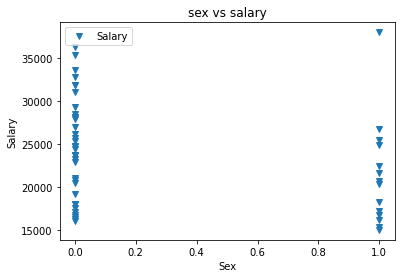

In [13]:
df.plot(x='Sex',y='Salary',style='v')
plt.title('sex vs salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

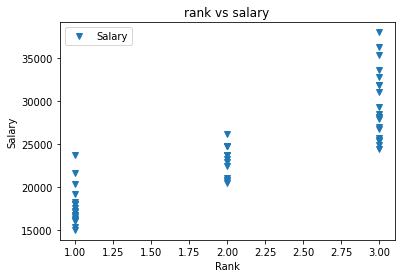

In [14]:
df.plot(x='Rank',y='Salary',style='v')
plt.title('rank vs salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

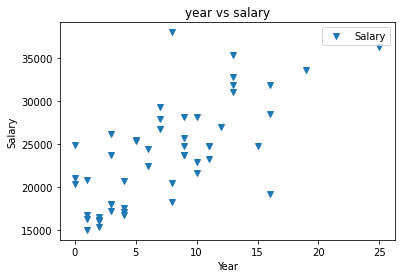

In [15]:
df.plot(x='Year',y='Salary',style='v')
plt.title('year vs salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

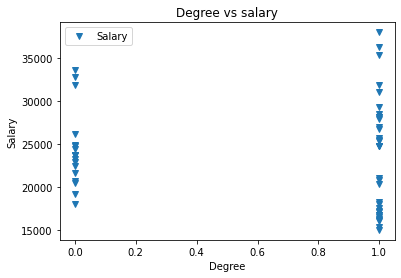

In [16]:
df.plot(x='Degree',y='Salary',style='v')
plt.title('Degree vs salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [44]:
X = df.iloc[:,0:4]
y = df['Salary']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [46]:
X_train.shape, y_train.shape

((41, 4), (41,))

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_test)

In [49]:
print(lr.coef_)
print(lr.intercept_)

[ 480.06848439 5281.52496923  344.18581779  -88.5587714 ]
10510.229281868473


In [53]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
31,23300,24859.323216
2,28200,29708.103596
42,20999,20984.720449
32,23713,18889.426611
30,21600,19713.680913
45,16094,16391.567115
33,20690,22930.090976
38,16700,17079.938751
44,16500,16391.567115
19,24450,28419.919096


In [54]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.6234174246327657